In [1]:
import pandas as pd
train=pd.read_csv("./input/train.csv")
test=pd.read_csv("./input/test.csv")
total=pd.concat([train,test],ignore_index=True)
len(train),len(test),len(total)

(159571, 153164, 312735)

In [2]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [3]:
test.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [4]:
total.tail()

,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
312730,". \n i totally agree, this stuff is nothing bu...",fffcd0960ee309b5,NaN,NaN,NaN,NaN,NaN,NaN
312731,== Throw from out field to home plate. == \n\n...,fffd7a9a6eb32c16,NaN,NaN,NaN,NaN,NaN,NaN
312732,""" \n\n == Okinotorishima categories == \n\n I ...",fffda9e8d6fafa9e,NaN,NaN,NaN,NaN,NaN,NaN
312733,""" \n\n == """"One of the founding nations of the...",fffe8f1340a79fc2,NaN,NaN,NaN,NaN,NaN,NaN
312734,""" \n :::Stop already. Your bullshit is not wel...",ffffce3fb183ee80,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [6]:
#from sklearn.metrics import make_scorer
#from sklearn.metrics import roc_auc_score
#auc_scorer=make_scorer(roc_auc_score, average='macro')

In [7]:
import nltk
stemmer=nltk.stem.PorterStemmer()
#stemmer.stem(vect.get_feature_names())

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import nltk

#vect=CountVectorizer(min_df=5,max_df=0.1)
porter=nltk.stem.PorterStemmer()
def tokenizer_porter(text):
    return[porter.stem(word) for word in text.split()]

vect = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=30000,
#tokenizer=tokenizer_porter
)

#vect=nltk.word_tokenize()




In [14]:
vect.fit(train.comment_text)

X_train=vect.transform(train.comment_text)          
X_test=vect.transform(test.comment_text)  

y_col=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y_train=train[y_col]

X_train.shape,y_train.shape

((159571, 30000), (159571, 6))

In [15]:
param_grid={'C':[1,]}
        

grid_y=[]
for y in y_col:
    print(y)
#    regr=LogisticRegression()
    y_train=train[y]
    regr=LogisticRegression(solver='sag')

    grid=GridSearchCV(regr,param_grid,cv=3,scoring= 'roc_auc',verbose=1)
    
    grid.fit(X_train,y_train)
    grid_y.append(grid)
    print(grid.best_score_, grid.best_params_)
    #regr_y.append(regr)
    #score=(cross_val_score(regr,X_train,y_train,cv=2,scoring= 'roc_auc')).mean()
    #print(score)
    #scores.append(score)

toxic
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.4s finished


0.970215805699 {'C': 1}
severe_toxic
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.8s finished


0.986324462504 {'C': 1}
obscene
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.3s finished


0.986050570533 {'C': 1}
threat
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.6s finished


0.981918446586 {'C': 1}
insult
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.4s finished


0.977127608206 {'C': 1}
identity_hate
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.0s finished


0.975038027371 {'C': 1}


In [16]:
import numpy as np
np.mean( [grid.best_score_ for grid in grid_y])

0.97944582014970427

In [17]:
for y,grid in zip(y_col,grid_y):
    y_train=train[y]
    print(y)
    grid.best_estimator_.fit(X_train,y_train)


toxic
severe_toxic
obscene
threat
insult
identity_hate


In [18]:
for y,grid in zip(y_col,grid_y):
    print(y)
    y_pred= grid.best_estimator_.predict_proba(X_test)
    test[y]=y_pred[:,1]

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [19]:
test.to_csv('log2.csv',index=False,columns=['id']+y_col)

In [20]:
test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.993952,0.129415,0.989635,0.022662,0.863432,0.163148
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.009465,0.003102,0.005563,0.001655,0.008833,0.003536
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.036466,0.003774,0.013640,0.001625,0.017988,0.004460
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.003435,0.002066,0.003196,0.001047,0.003844,0.000854
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.038453,0.002324,0.009296,0.001717,0.012261,0.002593
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0.006663,0.001645,0.004232,0.000865,0.007483,0.001496
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...,0.005243,0.001231,0.004365,0.000571,0.005510,0.001175
7,000247e83dcc1211,:Dear god this site is horrible.,0.584510,0.004119,0.042978,0.003104,0.118211,0.005997
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ...",0.016750,0.002625,0.012193,0.002175,0.011966,0.003013
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...,0.007173,0.001048,0.004987,0.000992,0.006766,0.001707


In [23]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [35]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [38]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [39]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [40]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [41]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


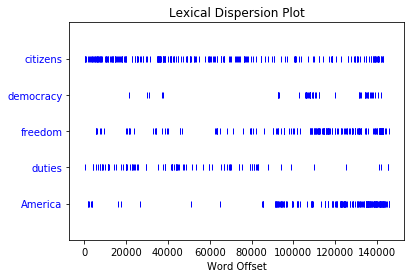

In [42]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [44]:
len(text3)

44764

In [45]:
len(set(text3))

2789

In [46]:
fdist1 = FreqDist(text1)

In [52]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [51]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [53]:
 sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [55]:
sorted(w for w in set(sent7) if not w.islower())

[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [57]:
sent1

['Call', 'me', 'Ishmael', '.']

In [58]:
nltk.chat.chatbots()

Which chatbot would you like to talk to?
  1: Eliza (psycho-babble)
  2: Iesha (teen anime junky)
  3: Rude (abusive bot)
  4: Suntsu (Chinese sayings)
  5: Zen (gems of wisdom)

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatb

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt


    Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a number in the range 1-5:     Error: bad chatbot number

Enter a n

KeyboardInterrupt: 

In [59]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [60]:
 emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [61]:
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [63]:
nltk.Text("a")

<Text: a...>

In [66]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [67]:
gutenberg.sents('shakespeare-macbeth.txt')

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [ ]:
text=nltk.Text(train.comment_text.lower())

In [72]:
len(text),len(train)

(159571, 159571)

In [73]:
text.collocations()

In [ ]:
fdist1 = FreqDist(text)

In [ ]:
text

In [78]:
from nltk.corpus import stopwords
stopwords.words('italian')

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [80]:
from nltk.corpus import swadesh
swadesh.words('it')

['io',
 'tu, Lei',
 'lui, egli',
 'noi',
 'voi',
 'loro, essi',
 'questo',
 'quello',
 'qui, qua',
 'là',
 'chi',
 'che',
 'dove',
 'quando',
 'come',
 'non',
 'tutto',
 'molti',
 'alcuni',
 'pochi',
 'altro',
 'uno',
 'due',
 'tre',
 'quattro',
 'cinque',
 'grande',
 'lungo',
 'largo',
 'spesso',
 'pesante',
 'piccolo',
 'corto',
 'stretto',
 'sottile',
 'donna',
 'uomo',
 'uomo',
 'bambino',
 'moglie',
 'marito',
 'madre',
 'padre',
 'animale',
 'pesce',
 'uccello',
 'cane',
 'pidocchio',
 'serpente',
 'verme',
 'albero',
 'foresta',
 'bastone',
 'frutta',
 'seme',
 'foglia',
 'radice',
 'corteccia',
 'fiore',
 'erba',
 'corda',
 'pelle',
 'carne',
 'sangue',
 'osso',
 'grasso',
 'uovo',
 'corno',
 'coda',
 'piuma',
 'capelli',
 'testa',
 'orecchio',
 'occhio',
 'naso',
 'bocca',
 'dente',
 'lingua',
 'unghia',
 'piede',
 'gamba',
 'ginocchio',
 'mano',
 'ala',
 'pancia',
 'intestino',
 'collo',
 'schiena',
 'petto',
 'cuore',
 'fegato',
 'bere',
 'mangiare',
 'mordere',
 'succhiare'